In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

2022-11-15 17:23:32.380711: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


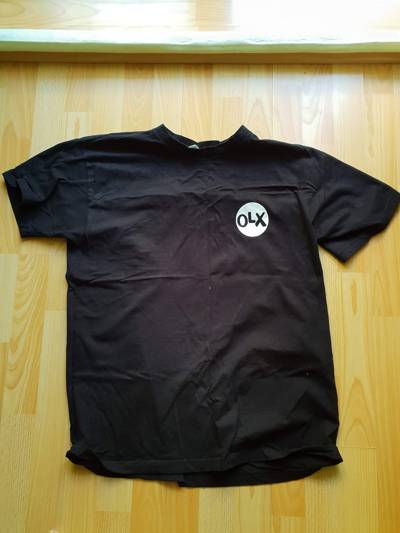

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

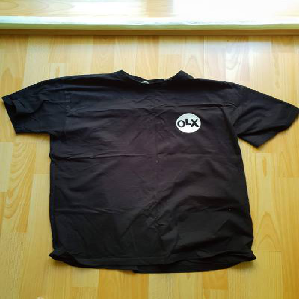

In [5]:
img= load_img(fullname, target_size=(299, 299))
img

In [6]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

2022-11-15 17:23:34.330447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 17:23:34.337018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 17:23:34.337628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 17:23:34.338537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [9]:
X = np.array([x])

In [10]:
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)
pred.shape

2022-11-15 17:23:37.855349: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-15 17:23:38.559284: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 17:23:38.560288: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 17:23:38.560332: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-15 17:23:38.561821: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-15 17:23:38.561921: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


(1, 1000)

In [13]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [18]:
X, y = next(train_ds)

In [21]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 2s 0us/step


In [24]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 19s 162ms/step - loss: 1.2816 - accuracy: 0.6705 - val_loss: 1.0265 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5604 - accuracy: 0.8207 - val_loss: 0.7713 - val_accuracy: 0.8123
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3280 - accuracy: 0.8833 - val_loss: 1.0550 - val_accuracy: 0.7771
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2748 - accuracy: 0.9055 - val_loss: 0.8340 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2204 - accuracy: 0.9224 - val_loss: 0.9405 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1314 - accuracy: 0.9524 - val_loss: 0.9744 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0775 - accuracy: 0.9729 - val_loss: 0.8771 - val_accuracy: 0.8152

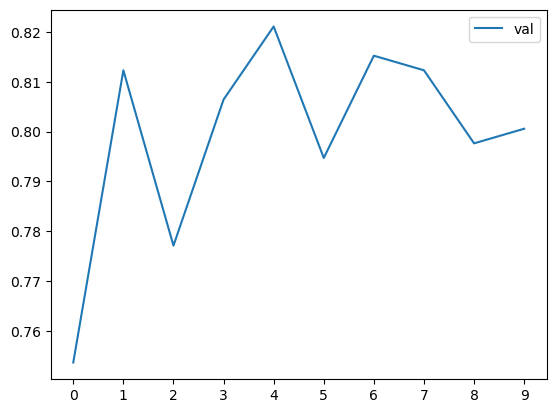

In [26]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjust Learning rate

In [27]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model


In [28]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 2.0469 - accuracy: 0.3214 - val_loss: 1.7243 - val_accuracy: 0.4311
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 1.4360 - accuracy: 0.5473 - val_loss: 1.3160 - val_accuracy: 0.5836
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 1.1650 - accuracy: 0.6287 - val_loss: 1.1154 - val_accuracy: 0.6393
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 1.0160 - accuracy: 0.6701 - val_loss: 0.9892 - val_accuracy: 0.6774
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9175 - accuracy: 0.7018 - val_loss: 0.9074 - val_accuracy: 0.7155
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.8478 - accuracy: 0.7243 - val_loss: 0.8484 - val_accuracy: 0.7155
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.7932 - accuracy: 0.7405 - val_loss: 0.8037 - val_accuracy:

In [29]:
del scores[0.1]
del scores[0.0001]

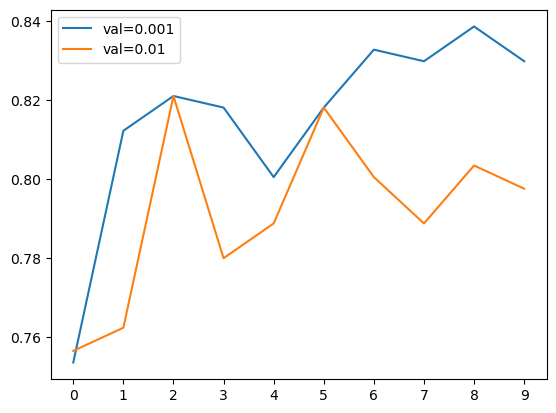

In [30]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [31]:
learning_rate = 0.001

## Checkpointing

In [32]:
model.save_weights('model_v1.h5', save_format='h5')

In [33]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [34]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 135ms/step - loss: 1.1020 - accuracy: 0.6362 - val_loss: 0.6768 - val_accuracy: 0.8035
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.6284 - accuracy: 0.7862 - val_loss: 0.5999 - val_accuracy: 0.8182
Epoch 3/10
96/96 [==============================] - 12s 121ms/step - loss: 0.5093 - accuracy: 0.8253 - val_loss: 0.5822 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.4278 - accuracy: 0.8628 - val_loss: 0.5373 - val_accuracy: 0.8299
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3706 - accuracy: 0.8853 - val_loss: 0.5355 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3281 - accuracy: 0.9048 - val_loss: 0.5363 - val_accuracy: 0.8416
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.2876 - accuracy: 0.9211 - val_loss: 0.5228 - val_accuracy: 0.8328

## Adding more layers

In [35]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [36]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 131ms/step - loss: 1.7616 - accuracy: 0.3990 - val_loss: 1.3716 - val_accuracy: 0.5777
Epoch 2/10
96/96 [==============================] - 12s 121ms/step - loss: 1.0997 - accuracy: 0.6558 - val_loss: 0.9855 - val_accuracy: 0.7273
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.8334 - accuracy: 0.7350 - val_loss: 0.8645 - val_accuracy: 0.7419
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.7153 - accuracy: 0.7624 - val_loss: 0.8071 - val_accuracy: 0.7537
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5902 - accuracy: 0.8038 - val_loss: 0.6837 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.4693 - accuracy: 0.8481 - val_loss: 0.6261 - val_accuracy: 0.7977
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3984 - accuracy: 0.8732 - val_loss: 0.6030 - val_accuracy: 0.8

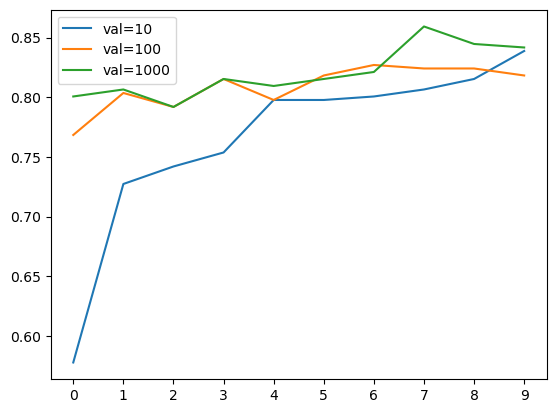

In [39]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

## Regularization and dropout

In [40]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [41]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 132ms/step - loss: 0.9828 - accuracy: 0.6802 - val_loss: 0.6332 - val_accuracy: 0.7918
Epoch 2/30
96/96 [==============================] - 12s 124ms/step - loss: 0.4523 - accuracy: 0.8439 - val_loss: 0.6046 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2908 - accuracy: 0.8996 - val_loss: 0.5683 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 12s 123ms/step - loss: 0.1690 - accuracy: 0.9498 - val_loss: 0.5981 - val_accuracy: 0.8240
Epoch 5/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0812 - accuracy: 0.9798 - val_loss: 0.6507 - val_accuracy: 0.8035
Epoch 6/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0433 - accuracy: 0.9932 - val_loss: 0.6716 - val_accuracy: 0.8211
Epoch 7/30
96/96 [==============================] - 12s 124ms/step - loss: 0.0318 - accuracy: 0.9954 - val_loss: 0.6107 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 12s 122ms/step - loss: 0.0378 - accuracy: 0.9870 - val_loss: 1.2887 - val_accuracy: 0.7918
Epoch 29/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0750 - accuracy: 0.9778 - val_loss: 1.1258 - val_accuracy: 0.8006
Epoch 30/30
96/96 [==============================] - 12s 122ms/step - loss: 0.0391 - accuracy: 0.9899 - val_loss: 1.0956 - val_accuracy: 0.8270


0.5
Epoch 1/30
96/96 [==============================] - 15s 131ms/step - loss: 1.0520 - accuracy: 0.6503 - val_loss: 0.6916 - val_accuracy: 0.7801
Epoch 2/30
96/96 [==============================] - 12s 123ms/step - loss: 0.6129 - accuracy: 0.7735 - val_loss: 0.5934 - val_accuracy: 0.7859
Epoch 3/30
96/96 [==============================] - 12s 122ms/step - loss: 0.4799 - accuracy: 0.8383 - val_loss: 0.5605 - val_accuracy: 0.8211
Epoch 4/30
96/96 [==============================] - 12s 122ms/step - loss: 0.3664 - accuracy: 0.8657 - val_loss: 0.5625 - val_accurac

Epoch 25/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2940 - accuracy: 0.8947 - val_loss: 0.5815 - val_accuracy: 0.8182
Epoch 26/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2929 - accuracy: 0.8957 - val_loss: 0.6231 - val_accuracy: 0.7947
Epoch 27/30
96/96 [==============================] - 12s 122ms/step - loss: 0.2841 - accuracy: 0.8999 - val_loss: 0.5956 - val_accuracy: 0.8240
Epoch 28/30
96/96 [==============================] - 12s 122ms/step - loss: 0.2882 - accuracy: 0.8944 - val_loss: 0.5496 - val_accuracy: 0.8270
Epoch 29/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2908 - accuracy: 0.8977 - val_loss: 0.5935 - val_accuracy: 0.8152
Epoch 30/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2702 - accuracy: 0.9003 - val_loss: 0.6222 - val_accuracy: 0.8270




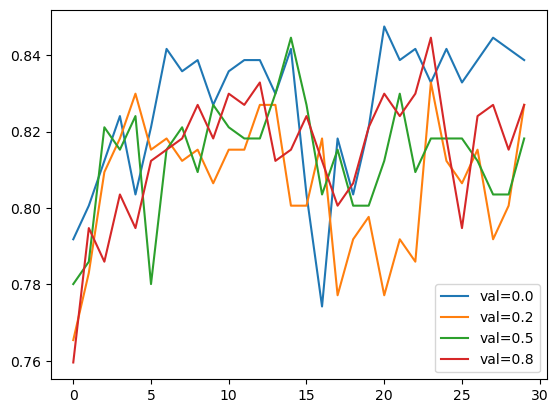

In [42]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

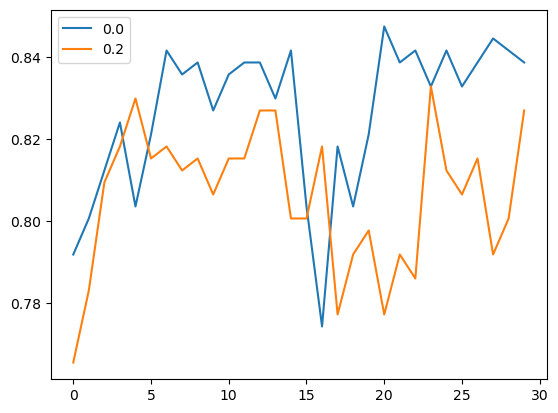

In [45]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))



## Training a larger model

In [46]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model


In [47]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)


Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [48]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [49]:
learning_rate = 0.001
size = 1000
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 73s 724ms/step - loss: 0.6566 - accuracy: 0.7751 - val_loss: 0.4159 - val_accuracy: 0.8563
Epoch 2/50
96/96 [==============================] - 68s 703ms/step - loss: 0.3879 - accuracy: 0.8611 - val_loss: 0.3800 - val_accuracy: 0.8651
Epoch 3/50
96/96 [==============================] - 67s 699ms/step - loss: 0.3136 - accuracy: 0.8843 - val_loss: 0.4431 - val_accuracy: 0.8446
Epoch 4/50
96/96 [==============================] - 67s 697ms/step - loss: 0.2619 - accuracy: 0.9035 - val_loss: 0.4251 - val_accuracy: 0.8651
Epoch 5/50
96/96 [==============================] - 67s 700ms/step - loss: 0.2724 - accuracy: 0.9019 - val_loss: 0.4011 - val_accuracy: 0.8739
Epoch 6/50
96/96 [==============================] - 67s 698ms/step - loss: 0.2074 - accuracy: 0.9221 - val_loss: 0.4012 - val_accuracy: 0.8768
Epoch 7/50
96/96 [==============================] - 67s 694ms/step - loss: 0.1886 - accuracy: 0.9335 - val_loss: 0.4079 - val_accuracy: 0.8592

## Using the model

In [51]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [52]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)


Found 372 images belonging to 10 classes.


In [53]:
model = keras.models.load_model('xception_v4_1_40_0.891.h5')

model.evaluate(test_ds)

12/12 [==============================] - 4s 287ms/step - loss: 0.4768 - accuracy: 0.8925


[0.47679978609085083, 0.8924731016159058]

In [54]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

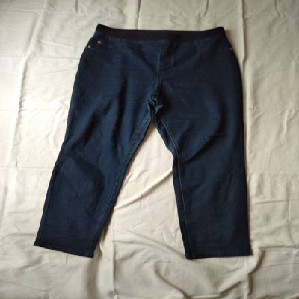

In [55]:
img = load_img(path, target_size=(299, 299))
img

In [56]:
import numpy as np

x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [57]:
X = preprocess_input(X)

pred = model.predict(X)

1/1 [==============================] - 1s 676ms/step


In [58]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, pred[0]))

{'dress': -7.8865647,
 'hat': -14.7581625,
 'longsleeve': -2.1703393,
 'outwear': -7.678357,
 'pants': 19.971027,
 'shirt': -9.225291,
 'shoes': -9.806766,
 'shorts': 6.423356,
 'skirt': -11.658481,
 't-shirt': -7.6217594}